### Found out number of bends after preprocessing using Shi-Tomasi corner detection 

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

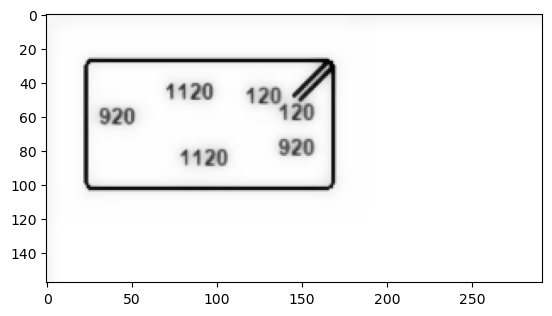

In [4]:
image_path = "4.png"

# Load the image
img = cv2.imread(image_path)
if not os.path.exists(image_path):
  raise FileNotFoundError(f"The image file '{img_path}' does not exist.")

# Grayscale Image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 30, 63, 3)
# 30,63,10
plt.imshow(gray, cmap='gray')

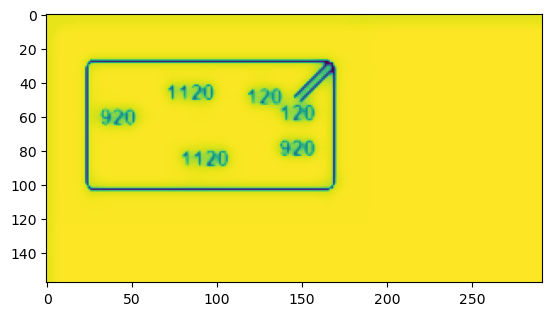

In [5]:
# Laplacian
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# Dilation kernel and iterations
dilation_kernel = np.ones((2, 2), np.uint8)
dilation_iterations = 5 # Number of dilation iterations

dilated_img = cv2.dilate(gray, dilation_kernel, dilation_iterations)
plt.imshow(dilated_img)

In [9]:
# Contour Detection
contours, hierarchy = cv2.findContours(dilated_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small objects by calculating the perimeter
perimeter_threshold = 60  # Adjust this threshold as needed
filtered_contours = [cnt for cnt in contours if cv2.arcLength(cnt, True) > perimeter_threshold]

# Draw contours on a white background
white_background = np.ones_like(img) * 255
contour_image = cv2.drawContours(white_background, filtered_contours, -1, (0, 0, 0), 2)

# Threshold
threshold_value = 87 #45
_, thresh = cv2.threshold(dilated_img, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

kernel = np.ones((1, 1), dtype=np.uint8)
closed_binary = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=2)

# Invert the mask to create a mask for numbers
mask = cv2.bitwise_not(thresh)

# Use Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(mask, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Draw corners on the mask image
mask_with_corners = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(mask_with_corners, (x, y), 3, (0, 0, 255), -1)

# Count the number of corners detected and calculate the number of bends
num_corners = len(corners)
num_bends = num_corners # Subtract 2 from the number of corners since ends are not bends

cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15284\2286471321.py:28: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


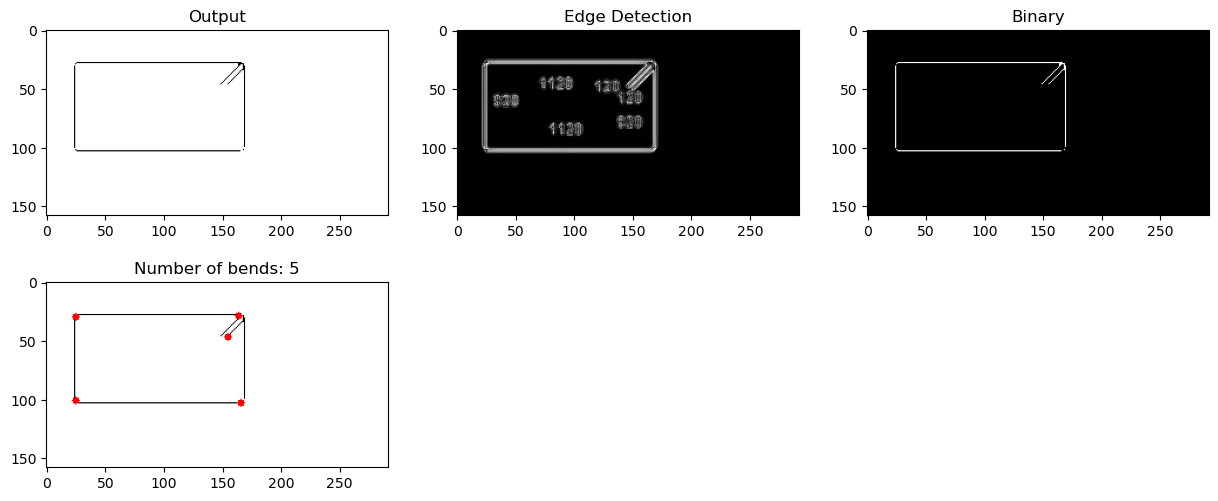

True

In [10]:
# Plotting
plt.figure(figsize=(15, 6))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(mask, cmap='gray')
plt.title('Output')

# Plot the Adaptive Binary image
plt.subplot(2, 3, 2)
plt.imshow(lap, cmap='gray')
plt.title('Edge Detection')

# # Plot the image without numbers
plt.subplot(2, 3, 3)
plt.imshow(thresh, cmap='gray')
plt.title('Binary')

# Plot the mask image with detected corners
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(mask_with_corners, cv2.COLOR_BGR2RGB))
plt.title(f'Number of bends: {num_bends}')

# Show the plots
plt.show()

cv2.imwrite("rect_CAB_output.jpg", mask)
cv2.imwrite("rect_CAB_bends.jpg", mask_with_corners)